# Handling Missing Data 

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("C:\\PythonProjects\\Jupyter_Project_DataCleaning\\loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


Step 1. => Checking what data we have or what null values we have :


In [94]:
# Checking shape of the data => matrix form 
print(dataset.shape)
print(dataset.shape[0])  # rows
print(dataset.shape[1])  # columns

(614, 13)
614
13



Counting of null values :

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Percentage of null values :

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.605863
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Total null values :

151

Overall null values Percentage :

1.8917564520170385

Total Not null values :

7831

Plotting Null values using heatmap



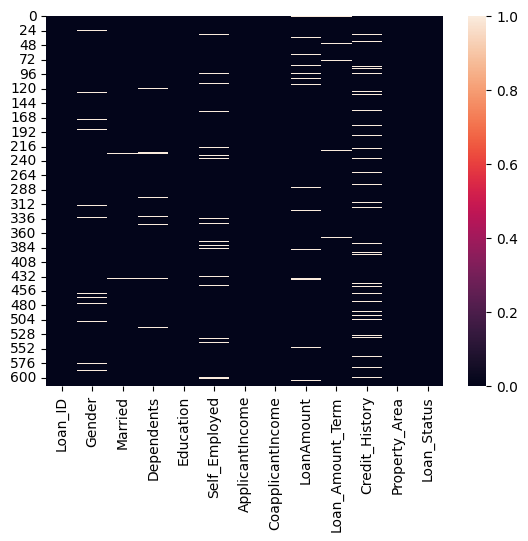

In [95]:
# Finding Null value :

# isnull() fxn => null value returns true ,otherwise returns false
# sum() fxn => returns counting.

print("\nCounting of null values :\n")
print(dataset.isnull().sum())

# Percentage of null values :

print("\nPercentage of null values :\n")
print((dataset.isnull().sum()/dataset.shape[0])*100) # (value/total value )*100


# Total null values :

print("\nTotal null values :\n")
print(dataset.isnull().sum().sum())

# Overall null value percentage :

print("\nOverall null values Percentage :\n") # (149 /614*13)*100
print((dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100) # dataset.shape[0]*dataset.shape[1] => overall boxes in matrix


# Not Null values present in the dataset :

# formula = notnull().sum().sum() => total filled data or not null data 

print("\nTotal Not null values :\n")
print(dataset.notnull().sum().sum())


# Graphical Plotting of  null values :

print("\nPlotting Null values using heatmap\n")
sns.heatmap(dataset.isnull())
plt.show()

Step 2 : What should we do with these values or data.

In [96]:
# first get all knowledege about dataset.
# then :
#      1. If the overall null values are greater than 50% then do not use that  dataset .Because we can not get the better insights from the data.
#     2. If null values from dataset is less than 50% then we can clean data .

# same for columns : if null values is greater than 50% then remove/drop the column.If the content is important than fill the null values.


# Step 3 : Handling Missing Values : Dropping

Change in Dataset ,Credit_History Column removed : 

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN               NaN   
1             4583             1508.0       1

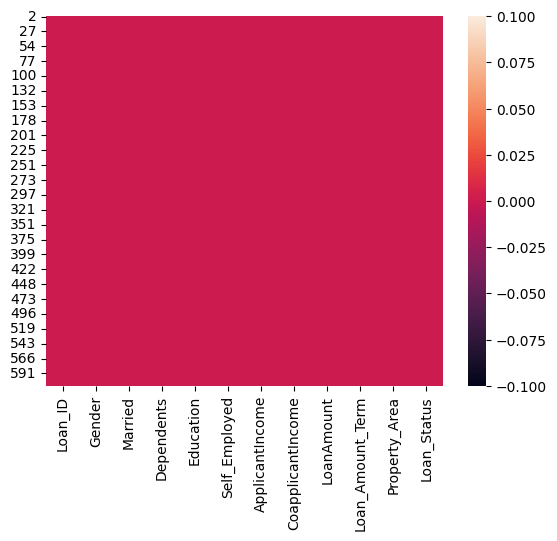


Shape after deleting rows with null values :

(522, 12)


In [97]:
# There are two methods for deleting or droping : 
#         1.Delete the columns entirely.
#         2.Delete the rows which has the null values.

# Columns wise : use "drop" fxn and 'columns' parameter.
#          it will create a new dataset and there will be no change in the excel dataset ,but we need to change the precious dataset not to create new one ,
#          so we will use "inplace" parameter.it will make changes in first time imported dataset.

dataset.drop(columns=["Credit_History"],inplace=True)

print("Change in Dataset ,Credit_History Column removed : \n")
print(dataset.head(10))

print("\nCheck null values :\n")
print(dataset.isnull().sum())

print("\nShape of the datset :\n")
print(dataset.shape)

# Row wise : delete null values row wise using "dropna() fxn " ,and for not creating new dataset use "inplace" parameter 

dataset.dropna(inplace=True)

print("\nRows containing null values are deleted and changed dataset is :\n")
print(dataset.head(20))

sns.heatmap(dataset.isnull())
plt.show()

print("\nShape after deleting rows with null values :\n")
print(dataset.shape)

In [98]:
# check how many data we lost :

((614-522)/614)*100

14.983713355048861

# Step 4 : Handling missing values : Imputing Category Data

In [99]:
dataset_im = pd.read_csv("loan.csv")
dataset_im.head(10)

# check missing content 

print(dataset_im.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [100]:
# fill data using : fillna() funxtion,it will all null values .

dataset_im.fillna(10).head(10) # this is a wrong way


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,10.0,10.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,10.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N



There are two types of data : numerical data & string / categorical / object data .

Filling Categorical Data :



In [101]:
print("\nInformation about dataset's datatype :\n")
print(dataset_im.info())

# Backward filling : piche vala data age vali null value mai fill ho jata hai 
#                   it is done by using "fillna"() fxn and method ="bfill" method.

print("\nBackward Filling :\n")
print(dataset_im.fillna(method="bfill").head(5))

# Forward filling : aage vala data piche vali null space mai fill ho jayega.
#                     it is done by using "fillna"() fxn and method ="ffill" method.

# 'axis' parameter : axis = 1 means column wise fill data in esy form previous column ka data next column ki null values mai fill ho jayega.

print("\nForward Filling :\n")
print(dataset_im.fillna(method="ffill",axis=1).head(5))



Information about dataset's datatype :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Backward Filling :

    Loan_ID Gender Married Dependents     Edu

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19764\3302197264.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(dataset_im.fillna(method="bfill").head(5))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19764\3302197264.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(dataset_im.fillna(method="ffill",axis=1).head(5))


In [102]:

# Mode filling : fill the data in each null space/or missing data , which is repeated maximum time.
#               mode k single column wise calculate kiya jata hai.


# finding mod : dataset["Gender"].mode()[0]
print(f"\nMode of the Gender Column is {dataset_im["Gender"].mode()[0]}\n")

# filling mod in place of null/missing values :

print("\nMod filling :\n")

dataset_im["Gender"].fillna(dataset_im["Gender"].mode()[0])



Mode of the Gender Column is Male


Mod filling :



0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [105]:
# If we want to fill mode inside all the object type data :
# we will use loop

# first Collection all object type data : dataset_im.select_dtypes(include="object")

for i in dataset_im.select_dtypes(include="object").columns:
       dataset_im[i].fillna(dataset_im[i].mode()[0],inplace=True)

dataset_im.isnull().sum()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19764\2285117094.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_im[i].fillna(dataset_im[i].mode()[0],inplace=True)


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling Missing Values : Scikit_learn 

In [112]:
dataset_sk = pd.read_csv("loan.csv")

print(dataset_sk.isnull().sum())

print("\n Checking types of data :\n")
print(dataset_sk.info())

print("\nData from datset containing only floats :\n")
print(dataset_sk.select_dtypes(include="float64").head(20))

print("\nName of columns from datset containing only floats :\n")
print(dataset_sk.select_dtypes(include="float64").columns)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Checking types of data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amou

In [115]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")
arr = si.fit_transform(dataset_sk[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

new_dataset = pd.DataFrame(arr,columns=dataset_sk.select_dtypes(include="float64").columns)

new_dataset.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64